## Person Detection - EDA

In [1]:
import fiftyone as fo
import fiftyone.zoo as foz
import matplotlib.pyplot as plt
import matplotlib.patches as patches

***Python 3.8 Deprecation Notice***
Python 3.8 will no longer be supported in new releases after October 1, 2024.
Please upgrade to Python 3.9 or later.
For additional details please see https://deprecation.voxel51.com


In [2]:
foz.list_zoo_datasets()

['activitynet-100',
 'activitynet-200',
 'bdd100k',
 'caltech101',
 'caltech256',
 'cifar10',
 'cifar100',
 'cityscapes',
 'coco-2014',
 'coco-2017',
 'fashion-mnist',
 'fiw',
 'hmdb51',
 'imagenet-2012',
 'imagenet-sample',
 'kinetics-400',
 'kinetics-600',
 'kinetics-700',
 'kinetics-700-2020',
 'kitti',
 'kitti-multiview',
 'lfw',
 'mnist',
 'open-images-v6',
 'open-images-v7',
 'places',
 'quickstart',
 'quickstart-3d',
 'quickstart-geo',
 'quickstart-groups',
 'quickstart-video',
 'sama-coco',
 'ucf101',
 'voc-2007',
 'voc-2012']

In [3]:
datasets = foz.load_zoo_dataset('coco-2017', splits=('train', 'validation', 'test'), classes=['person'], progress=True, max_samples=10000)
datasets

Found annotations at 'C:\Users\Aryan\fiftyone\coco-2017\raw\instances_train2017.json'
Only found 0 (<10000) samples matching your requirements
Existing download of split 'train' is sufficient
Found annotations at 'C:\Users\Aryan\fiftyone\coco-2017\raw\instances_val2017.json'
Only found 0 (<10000) samples matching your requirements
Existing download of split 'validation' is sufficient
Test split is unlabeled; ignoring classes requirement
Found test info at 'C:\Users\Aryan\fiftyone\coco-2017\raw\image_info_test2017.json'
Sufficient images already downloaded
Existing download of split 'test' is sufficient
Loading 'coco-2017' split 'train'
 100% |█████████████████████| 0/0 [4.4ms elapsed, ? remaining, ? samples/s]  
Loading 'coco-2017' split 'validation'
 100% |█████████████████████| 0/0 [3.6ms elapsed, ? remaining, ? samples/s]  
Loading 'coco-2017' split 'test'
Dataset is unlabeled; ignoring classes requirement
 100% |█████████████| 10000/10000 [3.5s elapsed, 0s remaining, 2.8K samples/s

Name:        coco-2017-train-validation-test-10000
Media type:  image
Num samples: 10000
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

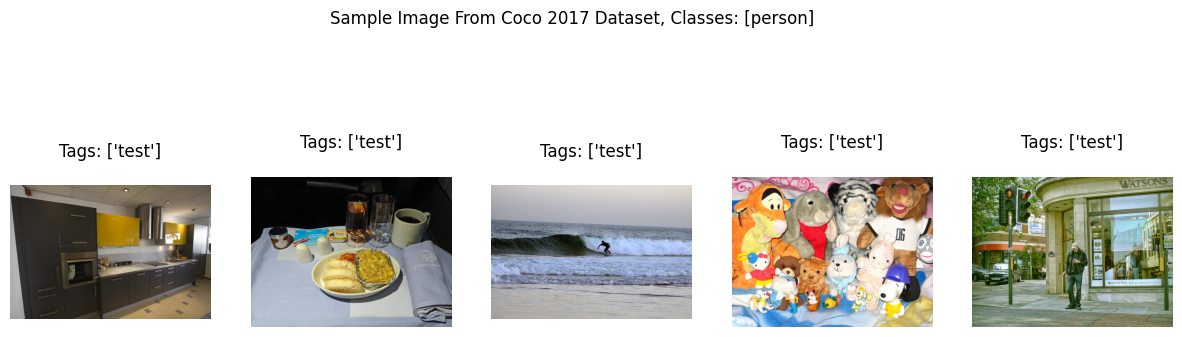

In [4]:
def show_sample(split_view):
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle("Sample Image From Coco 2017 Dataset, Classes: [person]")
    i = 1
    for d in split_view.take(5):
        ax = fig.add_subplot(1, 5, i)
        ax.set_title(f"Tags: {d.tags}\n")
        img = plt.imread(d.filepath)
        ax.imshow(img)
        ax.axis('off')
        i += 1

        # Skip for testing data
        if d.ground_truth is None:
            continue

        for detection in d.ground_truth.detections:
            x, y, w, h = detection.bounding_box
            image_height, image_width, _ = img.shape
            x1 = x * image_width
            y1 = y * image_height
            x2 = x1 + (w * image_width)
            y2 = y1 + (h * image_height)
            rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

for split in ['train', 'validation', 'test']:
    split_view = datasets.match_tags(split)
    show_sample(split_view)

In [5]:
for sample in datasets:
  if sample.ground_truth == None:
    continue

  detections = [detection for detection in sample.ground_truth.detections if detection.label == "person"]
  sample.ground_truth.detections = detections
  sample.save()

In [6]:
# Export the splits
for split in ['train', 'validation', 'test']:
    split_view = datasets.match_tags(split)
    split_view.export(
        export_dir='./yolov5-coco-datasets',
        dataset_type=fo.types.YOLOv5Dataset,
        label_field='ground_truth',
        split=split,
        classes=['person'],
    )

Directory './yolov5-coco-datasets' already exists; export will be merged with existing files
 100% |█████████████████████| 0/0 [27.4ms elapsed, ? remaining, ? samples/s] 
Directory './yolov5-coco-datasets' already exists; export will be merged with existing files
 100% |█████████████████████| 0/0 [29.1ms elapsed, ? remaining, ? samples/s] 
Directory './yolov5-coco-datasets' already exists; export will be merged with existing files
 100% |█████████████| 10000/10000 [30.8s elapsed, 0s remaining, 346.5 samples/s]      
